In [1]:
import pandas as pd
import numpy as np

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

# to plot the diagrams within the cells
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/tanlitung/Datasets/master/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396058,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.089843,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)

In [6]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
from sklearn import preprocessing

# Scale and plot the features against price (target) using the MinMax scaler (Normalization)
min_max_scaler = preprocessing.MinMaxScaler()
col_name = df.drop('price', axis = 1).columns[:]
x = df.loc[:, col_name]
y = df['price']

# Normalizing x
x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = col_name)

print(df.head())
x.head()

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


In [8]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

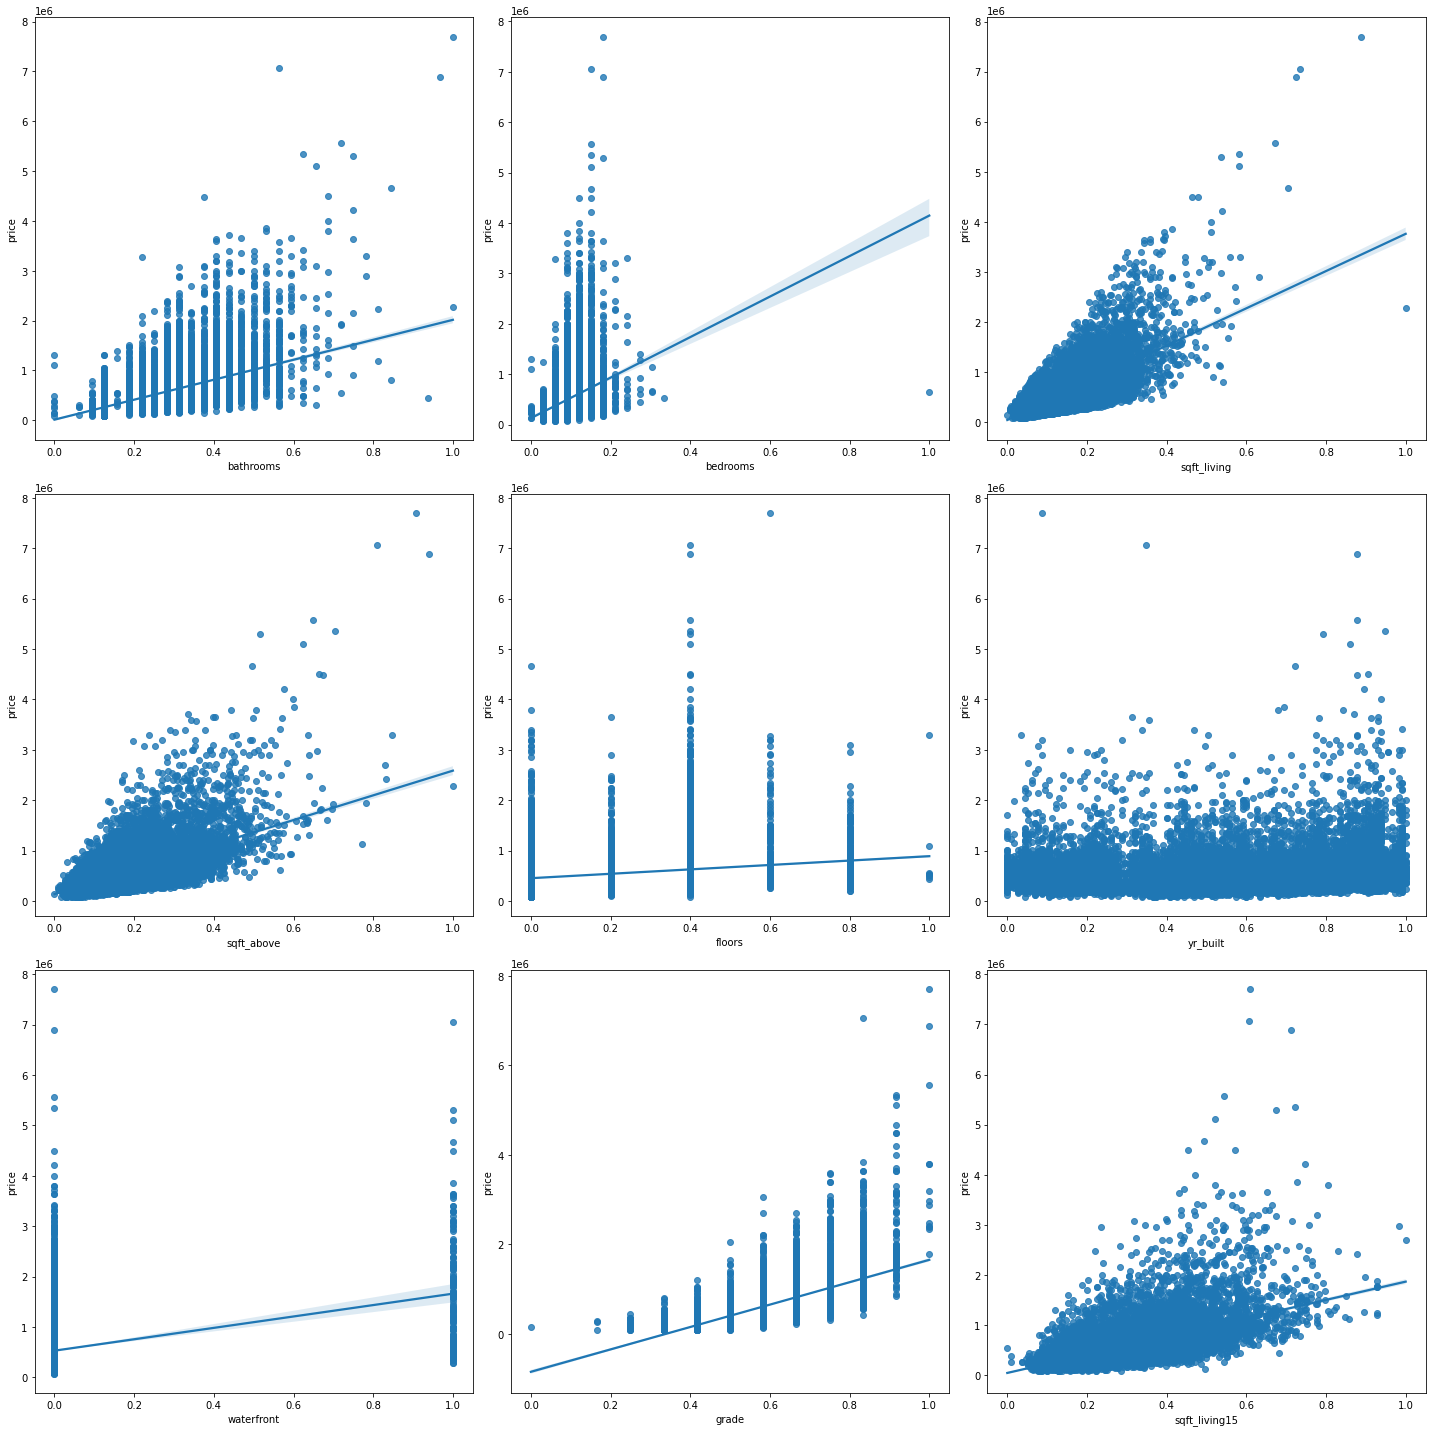

In [9]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 20))
sns.regplot(y = df['price'], x = x['bathrooms'], ax = axs[0, 0])
sns.regplot(y = df['price'], x = x['bedrooms'], ax = axs[0, 1])
sns.regplot(y = df['price'], x = x['sqft_living'], ax = axs[0, 2])
sns.regplot(y = df['price'], x = x['sqft_above'], ax = axs[1, 0])
sns.regplot(y = df['price'], x = x['floors'], ax = axs[1, 1])
sns.regplot(y = df['price'], x = x['yr_built'], ax = axs[1, 2])
sns.regplot(y = df['price'], x = x['waterfront'], ax = axs[2, 0])
sns.regplot(y = df['price'], x = x['grade'], ax = axs[2, 1])
sns.regplot(y = df['price'], x = x['sqft_living15'], ax = axs[2, 2])
plt.tight_layout()

In [11]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20582,3,2.50,1232,1130,3.0,0,0,3,7,1232,0,2007,0,98125,47.7185,-122.317,1232,1202
18508,2,0.75,550,7980,1.0,0,0,3,5,550,0,1952,0,98146,47.5110,-122.348,1330,7980
10193,3,2.50,1510,6095,2.0,0,0,4,7,1510,0,1991,0,98038,47.3498,-122.037,1520,6000
5303,2,1.00,960,8236,1.0,0,0,2,6,960,0,1948,0,98058,47.4698,-122.166,1260,8236
12622,3,1.50,1430,8000,1.0,0,0,4,7,1430,0,1956,0,98007,47.5874,-122.136,1450,8000


In [13]:
#Model Building
model = LinearRegression(normalize = True)
model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [16]:
print("Model intercept : ", model.intercept_, "\n")
print("Model coefficient: ", model.coef_, "\n")

for i in range(len(X.columns)):
    print(X.columns[i], ": ", model.coef_[i])

Model intercept :  2339247.370228407 

Model coefficient:  [-3.48694640e+04  4.32858706e+04  8.92321972e+01  9.57317998e-02
  3.33346247e+03  5.49888840e+05  5.11154608e+04  2.43213730e+04
  9.65622264e+04  9.58745645e+01  6.16048660e+01 -2.64689001e+03
  2.05528360e+01 -5.37573561e+02  6.09178195e+05 -2.12295761e+05
  1.61659280e+01 -3.23606205e-01] 

bedrooms :  -34869.46403039646
bathrooms :  43285.87064168846
sqft_living :  89.23219719698879
sqft_lot :  0.09573179977839534
floors :  3333.4624708668384
waterfront :  549888.8404614847
view :  51115.46080207393
condition :  24321.373014794914
grade :  96562.22644209332
sqft_above :  95.8745645203975
sqft_basement :  61.60486604433173
yr_built :  -2646.890007397438
yr_renovated :  20.552835983143524
zipcode :  -537.5735607332389
lat :  609178.1954640471
long :  -212295.7608632066
sqft_living15 :  16.16592798351343
sqft_lot15 :  -0.32360620527313005


In [18]:
# Model evaluation for training set
train_y_pred = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, train_y_pred)))
r2 = r2_score(y_train, train_y_pred)

# Examine the first 10 predicted output from the model
output = pd.DataFrame(y_train[0:10])
output['Predicted'] = train_y_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

          price      Predicted     Difference
20582  344000.0  324177.312240  -19822.687760
18508  115000.0  -28224.467099 -143224.467099
10193  260000.0  205275.661806  -54724.338194
5303    99000.0  123699.738730   24699.738730
12622  518000.0  417315.279675 -100684.720325
10654  350000.0  362486.860420   12486.860420
16224  215000.0  243776.256485   28776.256485
9736   292000.0  311052.129933   19052.129933
5474   280000.0  351172.010119   71172.010119
3597   350000.0  509432.473908  159432.473908 

Model training performance:
---------------------------
RMSE is 200510.12330757338
R2 score is 0.7031803480975287




In [19]:
# Model evaluation for testing set
test_y_pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, test_y_pred)))
r2 = r2_score(y_test, test_y_pred)

output = pd.DataFrame(y_test[0:10])
output['Predicted'] = test_y_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

           price     Predicted     Difference
9053    350000.0  6.358707e+05  285870.721089
11461   275000.0  1.601860e+05 -114814.010423
3508    695000.0  7.843721e+05   89372.071335
21600  1540000.0  1.298944e+06 -241056.102032
9728    215000.0  1.072858e+05 -107714.164047
10431   495000.0  4.746408e+05  -20359.212675
5403    497000.0  4.488807e+05  -48119.293123
5630    350000.0  2.822424e+05  -67757.603068
1340    445950.0  4.841154e+05   38165.364142
6787    235000.0  1.838377e+05  -51162.332665 

Model testing performance:
--------------------------
RMSE is 203100.5845022926
R2 score is 0.6920053387496208
